# Predicting Heart Disease with Machine Learning 

# Project Description
The database contains 14 attributes about patients' physical testing. They undergo blood tests and perform a small physical test. The "goal" column indicates the presence of heart disease in a patient - 0 means no disease, 1 means disease is present.

Contents
Information about attributes:
* age
* sex
* cp - chest pain type (4 values)
* trestbps - resting blood pressure
* chol - cholesterol level in blood, in mg/dl
* fbs - fasting blood sugar > 120 mg/dl
* restecg - resting electrocardiographic results (values 0,1,2)
* thalach - maximum heart rate
* exang - exercise induced angina
* oldpeak - ST depression induced by exercise relative to rest
* slope - the slope of the peak exercise ST segment
* ca - number of major vessels (0-3) colored by fluoroscopy
* thal - 3 = normal; 6 = fixed defect; 7 = reversible defect
* target - 0 means no heart disease, 1 means heart disease present

Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

# Steps Taken

## Data Import 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../DATA/heart.csv')

## Dataset Overview

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [45]:
df.info() # Indicates that there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## Exploratory Data Analysis (EDA)

### Distribution of Target Variable
The bar plot above illustrates the distribution of the target variable, which indicates the presence of heart disease in the patients:
- `0`: No heart disease.
- `1`: Heart disease is present.

From the graph, we observe that the dataset contains a relatively balanced number of patients with and without heart disease. This balance is important for building a machine learning model, as it reduces the likelihood of bias toward one class.

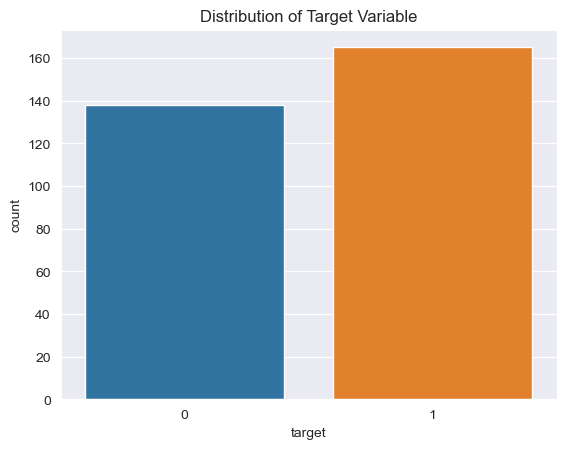

In [6]:
sns.set_style('darkgrid')
plt.title("Distribution of Target Variable")
plt.xlabel("Target (0 = No Heart Disease, 1 = Heart Disease)")
plt.ylabel("Count")
sns.countplot(x='target', data=df);

### Correlation Matrix  

**Key Observations:**

- The target variable (presence of heart disease) has strong positive correlations with cp (chest pain type, 0.43) and thalach (maximum heart rate, 0.42), indicating these features are highly relevant for prediction.
- Target shows a notable negative correlation with exang (exercise-induced angina, -0.44) and oldpeak (ST depression, -0.43), suggesting that these features inversely impact the target.
- Features like age, sex, and chol have weaker correlations with the target, implying lower predictive power.

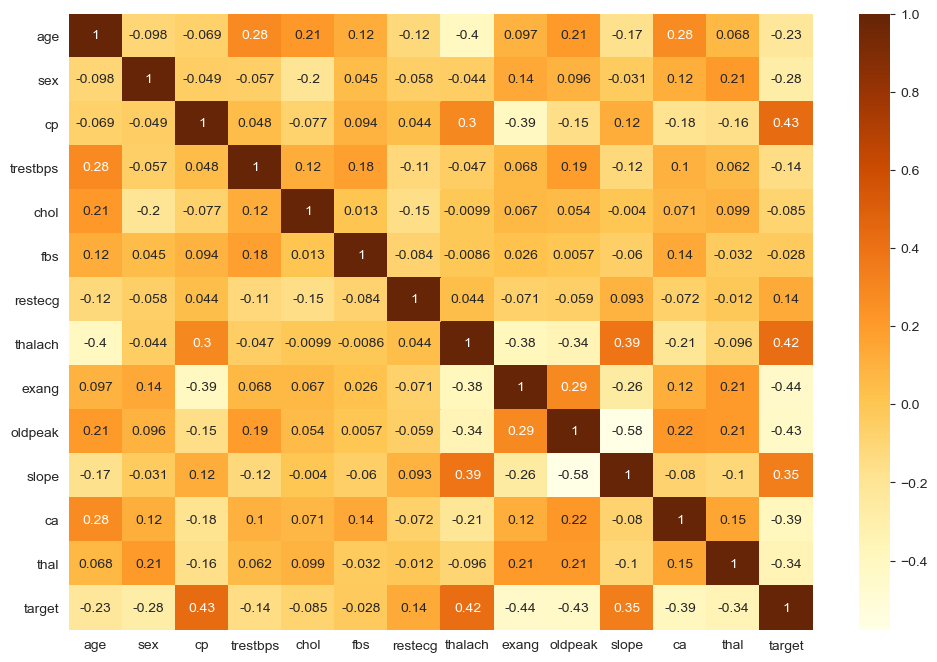

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='YlOrBr',annot=True);

In [42]:
df.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

### Violin plots of Key Feature

**Key Observations:**

**Restecg (Resting ECG):**
- Bimodal distribution in both groups
- Similar ranges and significant overlap
- Likely a weak predictor due to distribution overlap

**Slope:**
- Clear distribution differences between groups
- Healthy cases more uniform
- Disease cases concentrated in higher range
- Potentially good predictor

**Cp (Chest Pain Type):**
- Strong separation between groups
- Healthy cases: concentrated in lower values
- Disease cases: skewed towards higher values
- Likely a strong predictor

**Thalach (Maximum Heart Rate):**
- Disease cases concentrated around 160-180 bpm
- Healthy cases show broader distribution
- Shows moderate predictive potential

**Summary:** Chest pain type (cp) and slope appear to be the strongest predictors, followed by thalach, while restecg shows less predictive value due to significant overlap between groups.

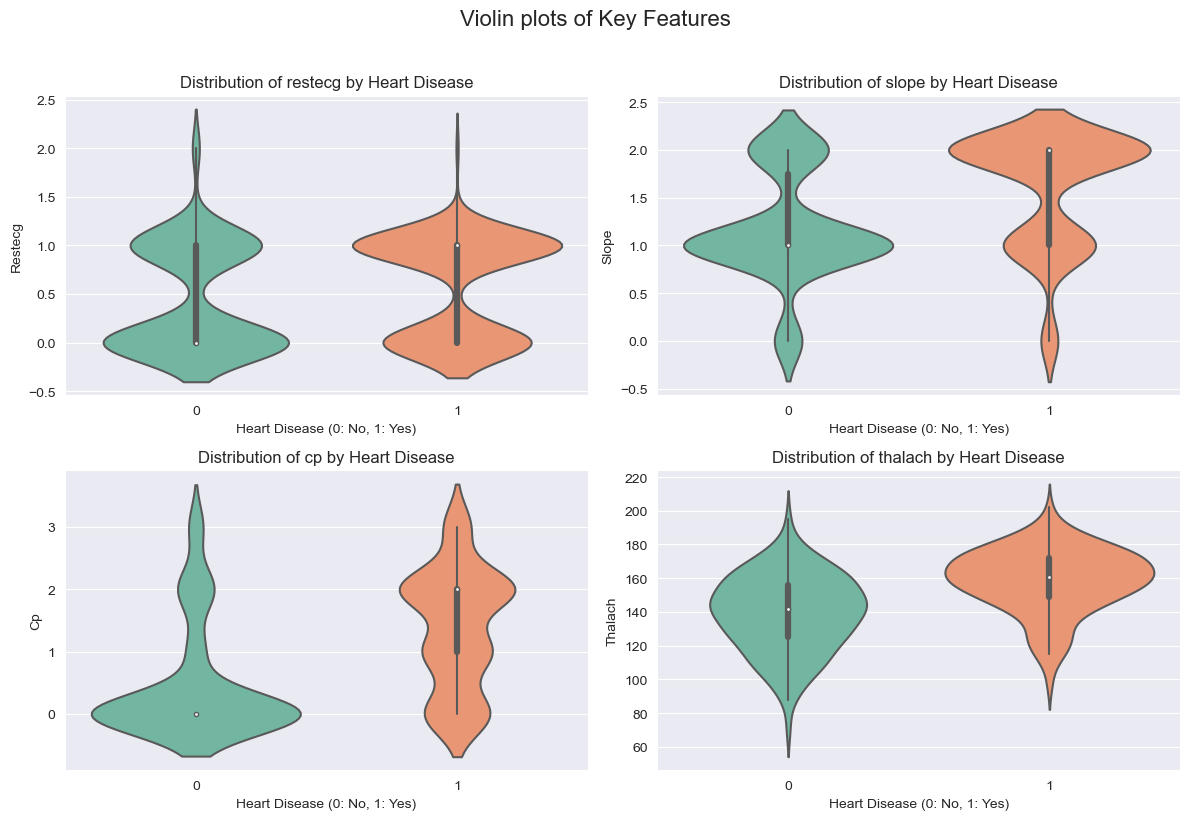

In [41]:
plt.figure(figsize=(12, 8))

# Subplot creation
features = ['restecg', 'slope', 'cp', 'thalach']

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    
    # Violin plot creation
    sns.violinplot(data=df, y=feature, x='target', palette='Set2')
    
    plt.title(f'Distribution of {feature} by Heart Disease')
    plt.xlabel('Heart Disease (0: No, 1: Yes)')
    plt.ylabel(feature.capitalize())
plt.suptitle("Violin plots of Key Features", y=1.02, fontsize=16);
plt.tight_layout();


## Feature Selection and Scaling

In [9]:
X = df.drop('target', axis=1)
y = df['target']

# Splitting the data into training and testing sets (90% training, 10% testing)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Scaling the data to standardize the features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modeling with LogisticRegressionCV

In [23]:
# Creating an LogisticRegressionCV model for regression

from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV(max_iter=1000)
model.fit(X_train, y_train)

# Making predictions on the test set

y_pred = model.predict(X_test)

## Model Performance

### Visualizing coefficients using a barplot

Key positive predictors:

 - cp (chest pain type): strongest positive impact
 - slope and restecg: moderate positive influence

Key negative predictors:

 - ca: strongest negative impact
 - thal, sex, oldpeak, exang: significant negative influence

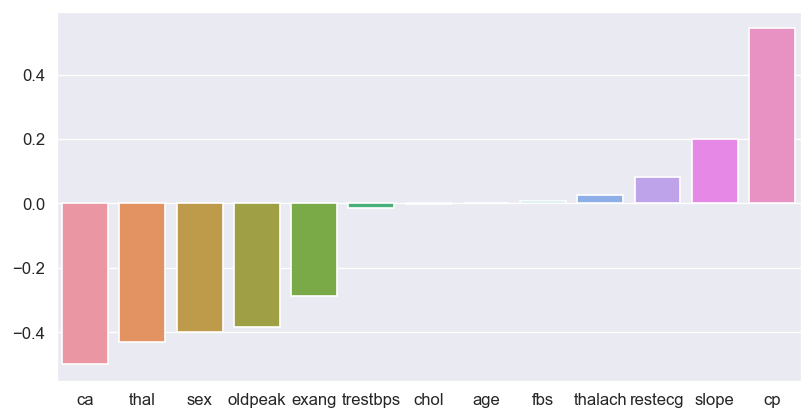

In [11]:
coefs = pd.Series(index=X.columns,data=model.coef_[0])
coefs = coefs.sort_values()
plt.figure(figsize=(8,4), dpi=120)
sns.barplot(x=coefs.index,y=coefs.values);

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
accuracy_score(y_test, y_pred)

0.8387096774193549

In [13]:
confusion_matrix(y_test, y_pred)

array([[12,  3],
       [ 2, 14]])

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Confusion Matrix Description

The confusion matrix above visualizes the performance of the model in predicting heart disease, with the following details:

**True Positives (Bottom Right: 14):**
- The model correctly identified 14 patients as having heart disease (True label = 1 and Predicted label = 1).

**True Negatives (Top Left: 12):**
- The model correctly classified 12 patients as not having heart disease (True label = 0 and Predicted label = 0).

**False Positives (Bottom Left: 2):**
- The model incorrectly predicted 2 healthy patients as having heart disease (True label = 0 but Predicted label = 1).
**False Negatives (Top Right: 3):**
- The model incorrectly predicted 3 patients with heart disease as healthy (True label = 1 but Predicted label = 0).

**Observations:**
- The majority of predictions are accurate, as shown by the high number of true positives and true negatives.
- There is a slight imbalance in misclassifications:
- False Negatives (3) are slightly higher than False Positives (2).
- This imbalance suggests that the model might prioritize precision slightly over recall, which can lead to some critical cases (patients with heart disease) being missed.

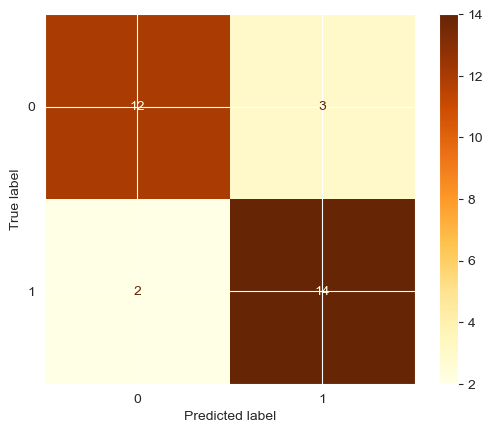

In [15]:
plot_confusion_matrix(model,X_test, y_test, cmap='YlOrBr');

### ROC Curve & Precision-Recall Curve Descriptions


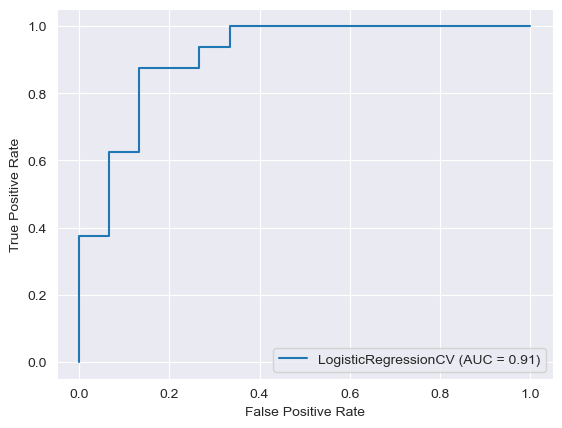

In [16]:
# ROC Curve Description

from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

plot_roc_curve(model, X_test, y_test);

**The ROC Curve illustrates the trade-off between the True Positive Rate (Sensitivity) and False Positive Rate.**

- The Area Under the Curve (AUC = 0.91) indicates excellent model performance, with a high ability to distinguish between patients with and without heart disease.
- A near-perfect AUC value suggests the model balances sensitivity and specificity effectively.

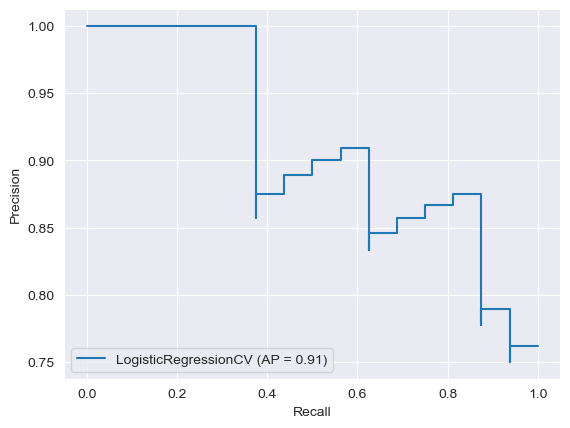

In [17]:
# Precision-Recall Curve Description

plot_precision_recall_curve(model, X_test, y_test);


**The Precision-Recall Curve shows the relationship between Precision (positive predictive value) and Recall (sensitivity).**

- The Average Precision (AP = 0.91) confirms that the model maintains high precision and recall across different thresholds.


# Conclusion



The model demonstrates good performance in predicting heart disease:

✅ Accuracy: The overall accuracy of **84%** indicates that the model correctly predicts heart disease for most cases.

✅ Precision and Recall:
- For patients without heart disease (label = 0), the precision is 86%, and recall is 80%.
- For patients with heart disease (label = 1), the precision is 82%, and recall is 88%.

✅ F1-Score:

- F1-scores of 0.83 (label = 0) and 0.85 (label = 1) reflect a good balance between precision and recall.

✅ Confusion Matrix Analysis:

- The model correctly classified 12 patients without heart disease and 14 patients with heart disease.
- However, it misclassified 3 patients with heart disease as healthy and 2 healthy patients as having heart disease.

📈 Overall: The model provides reliable predictions for heart disease detection. 
❎ However, improvements can be made to reduce the false negative rate (patients with heart disease classified as healthy), which is critical in medical diagnoses.